There are two main types of recommender systems: 

Content-based filters
Collaborative filters

Content-based filters predicts what a user likes based on what that particular user has liked in the past. On the other hand, collaborative-based filters predict what a user like based on what other users, that are similar to that particular user, have liked.

I have developed Collaborative based recommendation system.

I have followed following approach:
  1) Importing Libraries and Loading datasets

  2) Exploratoty Data Analysis(EDA) & Visualization

  3) Data Preprocessing & Preparing Main datasets.

  4) Computing Similarities between Songs using Cosine_similarities and K Nearest Neighbors(KNN) .

  5) Constructing Collaborative Recommendation System.

  6) Making Recommendation of Songs to Users.

   7) Acknowledgement and References




Detailed Descriptions of Datasets: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  ## to avoid warnings
warnings.filterwarnings("ignore")


In [2]:
# Considering only Thirty Thousands tuples for our dataset due to limitation of computational resources 

train_df = pd.read_csv("train.csv", nrows=30000) 
train_df.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
## checking shape
train_df.shape

(30000, 6)

In [4]:
song_df = pd.read_csv("songs.csv", nrows=30000)
song_df.head()


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
## checking shape
song_df.shape

(30000, 7)

In [6]:
song_extra_info_df = pd.read_csv("song_extra_info.csv")
song_extra_info_df.head()


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
## Checking shape
song_extra_info_df.shape

(2295971, 3)

# EDA

In [8]:
## Checking for missing values
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      91
source_screen_name    969
source_type            64
target                  0
dtype: int64

I have to take only msno and song_id columns from this dataset.Both have not any missing values.  

In [9]:
song_df.isna().sum()

song_id            0
song_length        0
genre_ids        494
artist_name        0
composer       12511
lyricist       21554
language           0
dtype: int64

So, in this dataset, I'll take all columns except song_length and language.  

In [10]:
song_extra_info_df.isna().sum()


song_id         0
name            2
isrc       136548
dtype: int64

I have to take only song_id and name column, so I'll handle null values only in 'name' column. 

In [11]:
## Data Types of all the datasets:-

train_df.dtypes

msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 int64
dtype: object

In [12]:
song_df.dtypes


song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

In [13]:
song_extra_info_df.dtypes


song_id    object
name       object
isrc       object
dtype: object

# Visualization

For recommending songs, genre, artist name, composer, lyricist , these are important factors, 
so I'll focus only on these attributes.

In [14]:
song_df['genre_ids'].value_counts()


465              12015
1609              1740
2022              1573
921               1217
958               1185
                 ...  
331                  1
2248|1259            1
2130|2122|958        1
465|2122|423         1
829|726              1
Name: genre_ids, Length: 321, dtype: int64

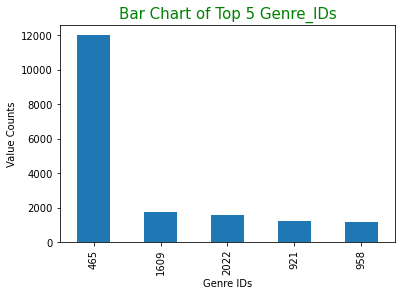

In [15]:
song_df['genre_ids'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Genre IDs')
plt.ylabel('Value Counts')
plt.title("Bar Chart of Top 5 Genre_IDs",
          color="green",
          fontsize=15);


song_df dataset contains large no. of songs with Genre_id with value 465.

In [16]:
song_df['artist_name'].value_counts()


Various Artists                                                                    1370
証聲音樂圖書館 ECHO MUSIC                                                                  301
貴族精選                                                                                104
張學友 (Jacky Cheung)                                                                   96
霹靂布袋戲劇集原聲帶                                                                           88
                                                                                   ... 
Laura Wright                                                                          1
Marmalade                                                                             1
放射空間 (Ground Zero)                                                                    1
긱스|소유 (씨스타)                                                                           1
101 Piano Classics: Best Classical Songs & Sad Piano Music Collective & Ambient       1
Name: artist_name, Length: 10776

In [17]:
song_df['composer'].value_counts()


Neuromancer                                               156
佚名                                                        115
Wolfgang Amadeus Mozart                                    85
Traditional                                                75
Johann Sebastian Bach                                      71
                                                         ... 
김윤성                                                         1
Yee Law                                                     1
Fernando José Montesinos Guerrero| Elmer Figueroa Arce      1
Choi Hyung Suk| Joe Han June                                1
Andrew Stockdale                                            1
Name: composer, Length: 11691, dtype: int64

# Data Preprocessing

In [18]:
song_df.isna().sum()

song_id            0
song_length        0
genre_ids        494
artist_name        0
composer       12511
lyricist       21554
language           0
dtype: int64

So, Filling Nan values only for genre_ids,composer and lyricist

# Filling NaNs/Missing Values with Empty String.


In [19]:
song_df['genre_ids'].fillna(' ', inplace=True)
song_df['composer'].fillna(' ', inplace=True)
song_df['lyricist'].fillna(' ', inplace=True)



In [20]:
song_df.isna().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [21]:
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      91
source_screen_name    969
source_type            64
target                  0
dtype: int64

Here, I have to take only msno and song_id, so will not do any thing here.

In [22]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

I have to take song_id and name column only, so will drop nan values for name column only because only 2 missing values are present.

In [23]:
song_extra_info_df['name'] = song_extra_info_df['name'].dropna()


In [24]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

Now for merging datasets to take out necessary columns to do recommendation

# Preparing Final Dataset

In [25]:
final_df = train_df.drop(['source_system_tab', 'source_screen_name', 'source_type', 'target'], axis = 1)
final_df.head()


,msno,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=


# Merging final_df with song_df

In [26]:
final_df = final_df.merge(song_df, on='song_id')
final_df = final_df.drop(['song_length', 'language'], axis=1)
final_df.head()


,msno,song_id,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,


# Now merging with song_extra_info_df

In [27]:
final_df = final_df.merge(song_extra_info_df, on='song_id').drop('isrc', axis=1)
final_df.head()


,msno,song_id,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda


# Renaming columns

In [28]:
final_df.rename(columns={'msno':'user_id','name' : 'song_name'}, inplace=True)
final_df.head()


,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda


# Performing preprocessing for final dataframe

In [29]:
final_df['genre_ids'].value_counts()


465         1683
458          847
444          135
921          133
1609         132
            ... 
465|1011       1
388|940        1
880            1
1955           1
465|2022       1
Name: genre_ids, Length: 62, dtype: int64

So from above we can see that some of the ids contains '|'.I'll replace it with blank space ' '

In [30]:
final_df['genre_ids'] = final_df['genre_ids'].str.replace('|', ' ', regex=True)
final_df['genre_ids'].value_counts()


465         1683
458          847
444          135
921          133
1609         132
            ... 
388            1
1955           1
465 1011       1
474            1
465 2022       1
Name: genre_ids, Length: 62, dtype: int64

When analysing csv file, I saw In attributes artist_name, composer and lyricist, '/' and '|' symbols are present.Replacing 
them by blank space.

In [31]:
final_df['artist_name'] = final_df['artist_name'].str.replace( '|',' ', regex=True)
final_df['artist_name'] = final_df['artist_name'].str.replace( '/',' ',  regex=True)

final_df['lyricist'] = final_df['lyricist'].str.replace( '|',' ', regex=True)
final_df['lyricist'] = final_df['lyricist'].str.replace( '/',' ', regex=True)

final_df['composer'] = final_df['composer'].str.replace( '|',' ', regex=True)
final_df['composer'] = final_df['composer'].str.replace( '/',' ', regex=True)


# Converting string into Lower Case for uniformity


In [32]:
final_df['artist_name']  = final_df['artist_name'].str.lower()
final_df['lyricist']  = final_df['lyricist'].str.lower()
final_df['composer']  = final_df['composer'].str.lower()


In [33]:
final_df.shape

(3523, 7)

In [34]:
#Unique songs
unique_songs = final_df['song_id'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")


There are 1458 unique songs in the dataset


In [35]:
#Unique artists
unique_artists = final_df['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")


There are 781 unique artists in the dataset


In [36]:
#Unique users
unique_users = final_df['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")


There are 1753 unique users in the dataset


# Most Popular Songs

In [37]:
popular_songs = final_df.groupby('song_name')['song_id'].count().reset_index().sort_values(['song_id', 'song_name'], ascending = False)


In [38]:
popular_songs.head()

,song_name,song_id
932,帥到分手,127
874,好好 (想把你寫成一首歌) (Song About You),77
841,夜空中最亮的星,54
1343,這是我 (This is me),51
1340,迷些路 (Lost On The Way),43


In [39]:
popular_songs.shape

(1429, 2)

# Most popular artist


In [40]:
#count how many rows we have by artist name, we show only the ten more popular artist 
popular_artists  = final_df.groupby(['artist_name'])['song_id'].count().reset_index().sort_values(['song_id', 'artist_name'], 
                                                                                                ascending = False)


In [41]:
popular_artists.head()

,artist_name,song_id
399,various artists,133
472,周湯豪 (nickthereal),128
427,五月天 (mayday),120
470,周杰倫 (jay chou),118
157,g.e.m.鄧紫棋,86


In [42]:
popular_artists.shape

(781, 2)

In [43]:
## How many songs does a user listen in average?


song_listen_count = final_df.groupby(['user_id'])['song_id'].count().reset_index().rename(columns = {'song_id':'avg_listen_count'})[['user_id','avg_listen_count']]


In [44]:
song_listen_count.shape

(1753, 2)

In [45]:
song_listen_count.head()

,user_id,avg_listen_count
0,+1a0wTElsAMdYysWZk1uBxeLnjxIc4vB2EznisNlpVw=,2
1,+6qXndZ2nMn0cyAWZlBfOBGVqolfO2CRo1MdVznK7Kg=,3
2,+87NgMj9nzysibH2vfBohydix5G7HN/mvxYGOXETgGk=,1
3,+9U5XsTQd6B+ol1h5wm87oMz/+cas2Eu3ig6h7HyH8s=,2
4,+Ez0nI/qWfSARukmK2mqdW6rffcVoJf5y74BEo+7NQ0=,5


In [46]:
final_df = final_df.merge(song_listen_count,on ='user_id',how = 'left' )

In [47]:
final_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,avg_listen_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,4
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,4


In [48]:
final_df.shape

(3523, 8)

In [49]:
final_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,avg_listen_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,4
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,2
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,4


In [50]:
song_user = final_df.groupby('user_id')['song_id'].count()


In [51]:
print(f"A user listens to an average of {np.mean(song_user)} songs")


A user listens to an average of 2.0096976611523103 songs


In [52]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")


A user listens to an average of 1.0 songs, with minimum 1 and maximum 34 songs


We can see that a user listens in average to 2 songs. Even the maximum amount of songs listen by an user is 34, and we have 3523 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the song x users matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.



In [53]:
values_matrix = unique_users * unique_songs


In [54]:
zero_values_matrix = values_matrix - final_df.shape[0]


In [55]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")


The matrix of users x songs has 2552351 values that are zero


## Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make easier, let's just select all those users that have listened to at least  2 songs.



In [56]:
# Get users which have listen to at least 2 songs
song_t_id = song_user[song_user > 2].index.to_list()


In [57]:
# Filtered the dataset to keep only those users with more than 2 listened
df_song_id_more_two = final_df[final_df['user_id'].isin(song_t_id)].reset_index(drop=True)


In [58]:
from scipy.sparse import csr_matrix

# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_two.pivot(index='song_id', columns='user_id', values='avg_listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)


In [59]:
df_songs_features.head()

user_id,+6qXndZ2nMn0cyAWZlBfOBGVqolfO2CRo1MdVznK7Kg=,+Ez0nI/qWfSARukmK2mqdW6rffcVoJf5y74BEo+7NQ0=,+Y+wTRRkZ0QA3bV4+7nwu8qlN5Kb7ygMhqvB5L929YI=,+aVBg5Dxo76UZL++0OFJUVW4LFOkhccy/U0NeMisBLo=,+qfv8JlG0jAVxP0tawbvpHA1WFtWBtEbwa74uoQTeh4=,/44F6AQCO2bz1TcSgAu5O0BWf8rAkAl7deB1orof7Ho=,/5nuIXE1veq8SP+0eBLarWW5+kJLWHwhpS6O8mFVPO0=,/XhRwPF08aF9hNUb/yN8Rbz6+LSghFkDoa2OX8zef48=,/mkt7jOTiWXeq2c3mUhVF0SayqpWbF1D7OUYYNreCiA=,07lCno3fuSM5XcKCBNtOIZBxumvUmEicmV+SBIAzPUo=,...,z27xJQmVRtXwq8ZBSeGGy7OUxwmgVlm8dRPix/JNFac=,z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=,z8f9Ms1BVEl08/nOmya8RYBhAzOUUrZR7yfuzupprzI=,zIVDNYrxuU1XALBSVZtZgwSWFK3ds3Ac9Egoy2h4304=,zRfOEH4Bl09lWEbWtYVEp5CffQ5VBDcSNFLumK291As=,zUbVBvS4+Rbl13lYdUrcyYLmeslbs/ourmea6l6hBds=,zXLzFiB5jQaph3W2EyGi5DGsUloRPcoVTG4VI5ullew=,zr2MEjwpv7bxzJ61TLLBPUoyoSnRqrD8p9BTyUIEXBE=,zx51OvMA6lJ+iNxD6lZnUppO8ZKHhuKBIAgGXAObgqQ=,zyCQN/h38OmzYOsR6ecE+b7GFkO2eCHoxT1tXoFdUjA=
song_id,,,,,,,,,,,,,,,,,,,,,
+3VBxMwSEK8RRCBdDpVPEHlezOYVBS7UXZdQcy1SK2k=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+7lDydxTue8a1N6QAPau0w2izu8qqPOdJq561QfKKH0=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+A746gr9EKmfVvPAkkLSEqddZxnzGhk19sez5yLFE4o=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
+BuoFaAw+sbIYkgPW7ReKkPQpJbW9zvT8+UU3bU7iKU=,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+Gh4vigxWuY4cL0rXPDUm8z6CwmzCFCdNlOValIkpkc=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the system will output the id of the song, instead of the name, we'll make a function that maps those indices with the song title.



In [60]:
df_unique_songs = final_df.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'song_name']]


In [61]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].song_name))
}


In [63]:
!pip install fuzzywuzzy

In [72]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz ##FuzzyWuzzy is a library of Python which is used for string matching
import numpy as np

class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)
    
    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended 
    
    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)
    
    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations
                 
    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}
    
    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 90:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        print(match_tuple)
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]



# Recommendations

In [73]:
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)


In [74]:
song = 'Panda'


In [75]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)


[('Panda', 84, 100)]
Starting the recommendation process for Panda ...
... Done


In [76]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")


The recommendations for Panda are:
['我變成了我', '人質', 'wia', '怎麼還不愛 (Why Not Love)', 'Coming Home', 'Wanna Be That Song', '夜空中最亮的星', 'Pull Up (feat. Lil Uzi Vert)', 'Tiimmy Turner', 'Call on Me (Ryan Riback Remix)']


# Thanking to LetsGrowMore and Respected Aman Kesarwani sir for this
golden opportunity to improve and enhance myself in the field of DataScience.
References:
https://github.com/ugis22/music_recommender https://towardsdatascience.com/the-abc-of-building-a-music-recommender-system-part-i-230e99da9cad
https://www.youtube.com/watch?v=-agdLu4tPxk&list=PLZoTAELRMXVN7QGpcuN-Vg35Hgjp3htvi&index=7
